## 22. Smoothing Using Orthogonal Functions

In this Chapter we study a different approach to nonparametric curve estimation based on **orthogonal functions**.  We begin with a brief introduction to the theory of orthogonal functions.  Then we turn to density estimation and regression.

### 22.1 Orthogonal Functions and $L_2$ Spaces

Let $v = (v_1, v_2, v_3)$ denote a three dimensional vector.  Let $\mathcal{V}$ denote the set of all such vectors.

- If $a$ is a scalar and $v$ is a vector, we define $av = (av_1, av_2, av_3)$.
- The sum of vectors $v$ and $w$ is defined as $v + w = (v_1 + w_1, v_2 + w_2, v_3 + w_3)$.
- The **inner product** between vectors $v$ and $w$ is defined by $\langle v, w \rangle = \sum_i v_i w_i$.
- The **norm** (or **length**) of a vector is defined by

$$ \Vert v \Vert = \sqrt{\langle v, v \rangle} = \sqrt{\sum_i v_i^2 }$$

- Two vectors are **orthogonal** (or **perpendicular**) if $\langle v, w \rangle = 0$.
- A set of vectors are orthogonal if each pair in the set is orthogonal.
- A vector is **normal** if $\Vert v \Vert = 1$.

Let $\phi_1 = (1, 0, 0)$, $\phi_2 = (0, 1, 0)$, $\phi_3 = (0, 0, 1)$.  These vectors are said to be an **orthonormal basis** for $\mathcal{V}$ since they have the following properties:

- they are orthogonal
- they are normal
- they form a basis for $\mathcal{V}$, that is, if $v \in \mathcal{V}$ then $v$ can be written as a linear combination of $\phi_i$, 

$$v = \sum_i \beta_i \phi_i
\quad \text{where } \beta_i = \langle \phi_i, v \rangle$$

There are other orthonormal basis for $\mathcal{V}$, for example

$$ \psi_1 = \left( \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}} , \frac{1}{\sqrt{3}} \right),
\quad
\psi_2 = \left( \frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}} , 0 \right),
\quad
\psi_3 = \left( \frac{1}{\sqrt{6}}, \frac{1}{\sqrt{6}} , -\frac{2}{\sqrt{6}} \right)
$$

Now we make the leap from vectors to functions.  Basically, we just replace vectors with functions and sums with integrals.

Let $L_2(a, b)$ denote all functions defined on the interval $[a, b]$ such that $\int_a^b f(x)^2 dx < \infty$:

$$ L_2(a, b) = \left\{ f: [a, b] \rightarrow \mathbb{R} , \int_a^b f(x)^2 < \infty \right\} $$

We sometimes write $L_2$ instead of $L_2(a, b)$.

- The inner product between two functions $f, g \in L_2$ is $\langle f, g \rangle = \int f(x) g(x) dx$.
- The norm of $f$ is

$$ \Vert f \Vert = \sqrt{\int f(x)^2 dx} $$

- Two functions are orthogonal if $\langle f, g \rangle = 0$.
- A function is normal if $\Vert f \Vert = 1$.
- A sequence of functions $\phi_1, \phi_2, \phi_3, \dots$ is **orthonormal** if $|| \phi_i || = 1$ for each $i$ and $\langle \phi_i, \phi_j \rangle = 0$ for $i \neq j$.
- An orthonormal sequence is **complete** if the only function that is orthogonal to each $\phi_i$ is the zero function.  In that case, the functions $\phi_1, \phi_2, \phi_3, \dots$ for a basis, meaning that if $f \in L_2$ then $f$ can be written as

$$ f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)
\quad \text{where } \beta_j = \int_a^b f(x) \phi_j(x) dx $$

**Parseval's relation** says that

$$ \Vert f \Vert^2 \equiv \int f^2(x) dx = \sum_{j=1}^\infty \beta_j^2 \equiv \Vert \beta \Vert^2$$

The **cosine basis** is defined as follows:  Let $\phi_1(x) = 1$ and for $j \geq 2$ define

$$\phi_j(x) = \sqrt{2} \cos \left( (j - 1) \pi x\right)$$

The first ten functions are plotted below.

In [1]:
import numpy as np

def cosine_basis(j):
    assert j >= 1
    
    def f(x):
        if j == 1:
            return np.ones_like(x)   
        return np.sqrt(2) * np.cos((j - 1) * np.pi * x)
    
    return f

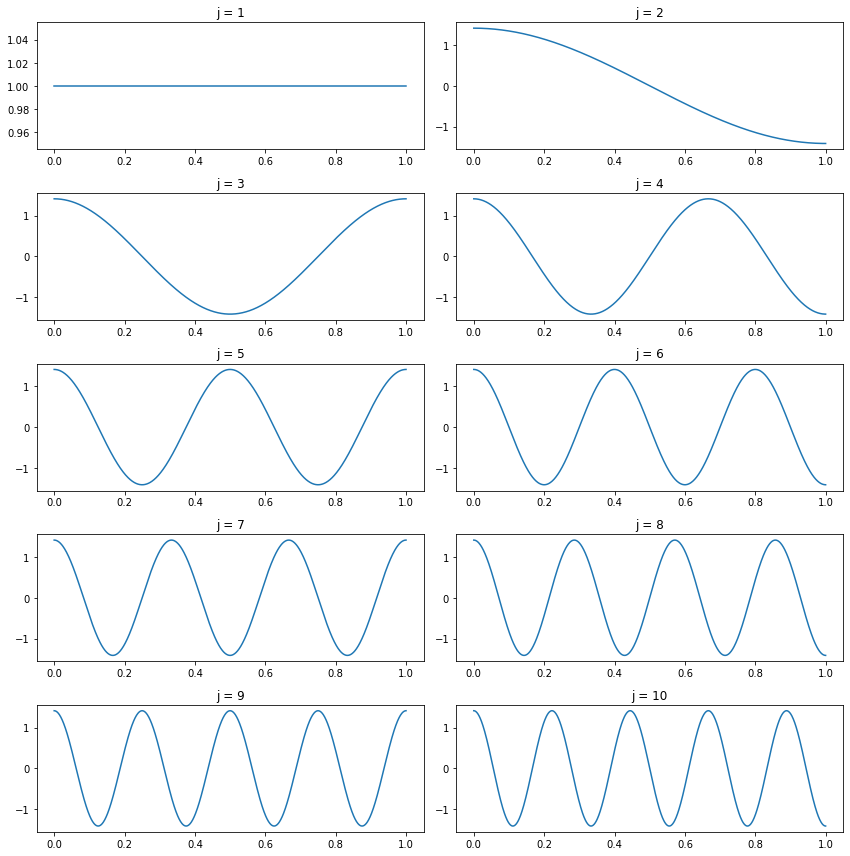

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

step = 1e-3
xx = np.arange(0, 1 + step, step=step)
plt.figure(figsize=(12, 12))
for i in range(1, 11):
    
    # Set up the plot
    ax = plt.subplot(5, 2, i)
    ax.plot(xx, cosine_basis(i)(xx))
    ax.set_title('j = %i' % i)

plt.tight_layout()
plt.show()

The **Legendre polynomials** on $[-1, 1]$ are defined by

$$ P_j(x) = \frac{1}{2^i j!} \frac{d^j}{dx^j} (x^2 - 1)^j, \quad j = 0, 1, 2, \dots $$

It can be shown that these functions are complete and orthogonal, and that

$$ \int_{-1}^1 P_j^2(x) dx = \frac{2}{2j + 1}$$

It follows that the functions

$$ \phi_j(x) = \sqrt{\frac{2j + 1}{2}}P_j(x), \quad j = 0, 1, 2, \dots $$

form an orthonormal basis for $L_2[-1, 1]$.  The first few Legendre polynomials are

$$
\begin{align}
P_0(x) &= 1 \\
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}\left( 3x^2 - 1 \right) \\
P_3(x) &= \frac{1}{2}\left( 5x^3 - 3x \right)
\end{align}
$$


These polynomials may be constructed explicitly using the following recursive relation:

$$ P_{j+1}(x) = \frac{(2j + 1) x P_j(x) - j P_{j - 1}(x)}{j + 1} $$

In [3]:
import sympy
from sympy.abc import x
from functools import lru_cache

@lru_cache(maxsize=None)
def legendre_polynomial(j):
    if j == 0:
        return 1
    if j == 1:
        return x
    
    return sympy.expand(((2*j - 1) * x * legendre_polynomial(j - 1) - (j - 1) * legendre_polynomial(j - 2)) / j)

def legendre_basis(j):
    if j == 0:
        return lambda x: np.sqrt(1/2) * np.ones_like(x)
    
    pj = legendre_polynomial(j)
    return sympy.lambdify(x, sympy.sqrt((2*j + 1) / 2) * pj, "numpy")

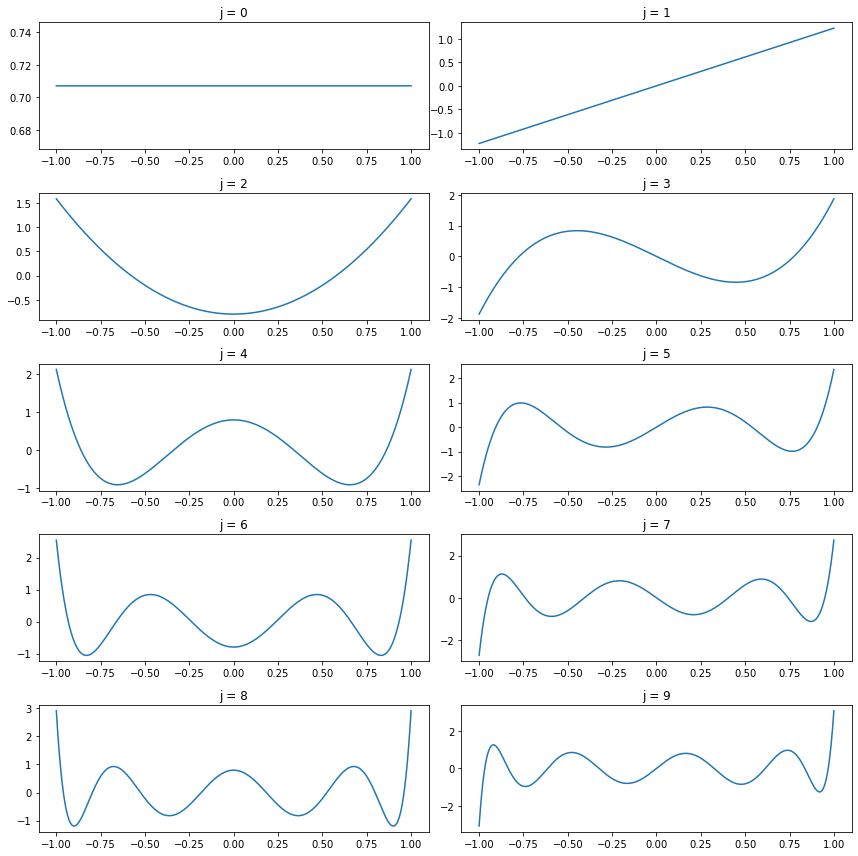

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

step = 1e-3
xx = np.arange(-1, 1 + step, step=step)
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    
    # Set up the plot
    ax = plt.subplot(5, 2, i + 1)
    ax.plot(xx, legendre_basis(i)(xx))
    ax.set_title('j = %i' % i)

plt.tight_layout()
plt.show()

The coefficients $\beta_1, \beta_2, \dots$ are related to the smoothness of the function $f$.  To see why note that, if $f$ is smooth, then its derivative will be finite.  Thus we expect that, for some $k$, $\int_0^1 (f^{(k)}(x))^2 dx < \infty$, where $f^{(k)}$ is the $k$-th derivative of $f$.

Now consider the cosine basis and let $f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)$.  Then,

$$ \int_0^1 (f^{(k)}(x))^2 dx = 2 \sum_{j=1}^\infty \beta_j^2 ( \pi (j - 1) ) ^{2k} $$

The only way the sum can be finite is if the $\beta_j$'s get small when $j$ gets large.  To summarize:

**If the function $f$ is smooth then the coefficients $\beta_j$ will be small when $j$ is large.**

For the rest of this chapter, we will assume we are using the cosine basis unless otherwise specified.

### 22.2 Density Estimation

Let $X_1, \dots, X_n$ be IID observations from a distribution on $[0, 1]$ with density $f$.  Assuming $f \in L_2$ we can write

$$ f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x) $$

where $\phi_i$s form an orthonormal basis.  Define

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n \phi_j(X_i)$$

**Theorem 22.4**.  The mean and variance of the $\hat{\beta}_j$ are

$$
\mathbb{E}(\hat{\beta}_j) = \beta_j
\quad \text{and} \quad
\mathbb{V}(\hat{\beta}_j) = \frac{\sigma_j^2}{n}
$$

where

$$ \sigma_j^2 = \mathbb{V}(\phi_j(X_i)) = \int \left( \phi_j(x) - \beta_j\right)^2f(x) dx$$

**Proof**.  We have

$$ \mathbb{E}(\hat{\beta}_j) = \frac{1}{n} \sum_{i=1}^n \mathbb{E}(\phi_j(X_i)) = \mathbb{E}(\phi_j(X_1))  = \int \phi_j(x) f(x) dx = \beta_j$$

The calculation for variance is similar:

$$ \mathbb{V}(\hat{\beta}_j) = \frac{1}{n^2} \sum_{i=1}^n \mathbb{V}(\phi_j(X_i)) = \frac{1}{n} \mathbb{V}(\phi_j(X_1)) = \frac{1}{n} \int \left( \phi_j(x) - \beta_j\right)^2f(x) dx $$

Hence, $\hat{\beta}_j$ is an unbiased estimate of $\beta_j$.  It is tempting to estimate $f$ by $\sum_{i=1}^\infty \hat{\beta}_j \phi_j(x)$ but it turns out to have a very high variance.  Instead, consider the estimator

$$ \hat{f}(x) = \sum_{i=1}^J \hat{\beta}_j \phi_j(x) $$

The number of terms $J$ is a smoothing parameter.  Increasing $J$ will decrease bias while increasing variance.  For technical reasons, we restrict $J$ to lie in the range $1 \leq J \leq p$ where $p = p(n) = \sqrt{n}$.  To emphasize the dependence of the risk function on $J$, we write the risk function as $R(J)$.

**Theorem 22.5**.  The risk of $\hat{f}$ is given by

$$ R(J) = \sum_{j=1}^J \frac{\sigma_j^2}{J} + \sum_{j=J+1}^\infty \beta_j^2 $$

In kernel estimation, we used cross-validation to estimate the risk.  In the orthogonal function approach, we instead use the risk estimator

$$ \hat{R}(J) = \sum_{j=1}^J \frac{\hat{\sigma}_j^2}{n} + \sum_{j=J+1}^p \left( \hat{\beta}_j^2 - \frac{\hat{\sigma}_j^2}{n} \right)_{+}$$

where $a_{+} = \max \{ a, 0 \}$ and 

$$ \hat{\sigma}_j^2 = \frac{1}{n - 1} \sum_{i=1}^n \left( \phi_j(X_i) - \hat{\beta}_j\right)^2 $$

To motivate this estimator, note that $\hat{\sigma}_j^2$ is an unbiased estimator of $\sigma^2$ and $\hat{\beta}_j^2 - \hat{\sigma}_j^2 / n$ is an unbiased estimator of $\beta_j^2$.  We take the positive part of the later term since we know $\beta_j^2$ cannot be negative.  We now choose $1 \leq \hat{J} \leq p$ to minimize the risk estimator $\hat{R}(J)$.

**Summary of Orthogonal Function Density Estimation**

1.  Let

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n \phi_j(X_i) $$

2.  Choose $\hat{J}$ to minimize $\hat{R}(J)$ over $1 \leq J \leq p = \sqrt{n}$ where

$$ \hat{R}(J) = \sum_{j=1}^J \frac{\hat{\sigma}_j^2}{n} + \sum_{j=J+1}^p \left( \hat{\beta}_j^2 - \frac{\hat{\sigma}_j^2}{n} \right)_{+}$$

and

$$ \hat{\sigma}_j^2 = \frac{1}{n - 1} \sum_{i=1}^n \left( \phi_j(X_i) - \hat{\beta}_j\right)^2 $$

3.  Let

$$ \hat{f}(x) = \sum_{j=1}^\hat{J} \hat{\beta}_j \phi_j(x) $$

The estimator $\hat{f}_n$ can be negative.  If we are interested in estimating the shape of $f$, this is not a problem.  However, if we need the estimate to be a probability density function, we can truncate the estimate and then normalize it:  
$$\hat{f}^*(x) = \frac{\max \{ \hat{f}_n(x), 0 \}}{\int_0^1 \max \{ \hat{f}_n(u), 0 \} du}$$

Now, let us construct a confidence band for $f$.  Suppose we estimate $f$ using $J$ orthogonal functions.  We are essentially estimating $\overline{f}(x) = \sum_{j=1}^J \beta_j \phi_j(x)$ instead of the true density $f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)$.  Thus the confidence band should be regarded as a band for $\overline{f}(x)$.

**Theorem 22.6**.  An approximate $1 - \alpha$ confidence band for $\overline{f}$ is $(\ell(x), u(x))$ where

$$
\ell(x) = \hat{f}_n(x) - c
\quad \text{and} \quad
u(x) = \hat{f}_n(x) + x
$$

where

$$ c = \frac{JK^2}{\sqrt{n}} \sqrt{1 + \frac{\sqrt{2} z_{\alpha}}{\sqrt{J}}} $$

and

$$ K = \max_{1 \leq j \leq J} \max_x | \phi_j(x) | $$

For the cosine basis, $K = \sqrt{2}$.

### 22.3 Regression

Consider the regression model

$$ Y_i = r(x_i) + \epsilon_i, \quad i = 1, \dots, n$$

where $\epsilon_i$ are independent with mean 0 and variance $\sigma^2$.  We will initially focus on the special case where $x_i = i / n$.  We assume that $r \in L_2[0, 1]$ and hence we can write

$$
r(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)
\quad \text{where } \beta_j = \int_0^1 r(x) \phi_j(x) dx
$$

where $\phi_1, \phi_2, \dots$ is an orthonormal basis for $[0, 1]$.

Define

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n Y_i \phi_j(x), 
\quad j = 1, 2, \dots$$

Since $\hat{\beta}_j$ is an average, the central limit theorem tells us that $\hat{\beta}_j$ will be approximately normally distributed.

**Theorem 22.8**.

$$ \hat{\beta}_j \approx N \left( \beta_j, \frac{\sigma^2}{n} \right) $$

**Proof**.  The mean of $\hat{\beta}_j$ is

$$ \mathbb{E}(\hat{\beta}_j) = \frac{1}{n} \sum_{i=1}^n \mathbb{E}(Y_i) \phi_j(x_i) = \frac{1}{n} \sum_{i=1}^n r(x_i) \phi_j(x_i) \approx \int r(x) \phi_j(x) dx = \beta_j$$

where the approximate equality follows from the definition of a Riemann integral: $\sum_i h(x_i) / n \rightarrow \int_0^1 h(x) dx$.

The variance is

$$ \mathbb{V}(\hat{\beta}_j) = \frac{1}{n^2} \sum_{i=1}^n \mathbb{V}(Y_i) \phi_j(x_i) = \frac{\sigma^2}{n} \left( \frac{1}{n} \sum_{i=1}^n \phi_j^2(x_i) \right) \approx \frac{\sigma^2}{n} \left( \int \phi_j^2(x) dx \right) = \frac{\sigma^2}{n}$$

since $\phi_j$ has norm 1.

As we did for density estimation, we will estimate $r$ by 

$$ \hat{r}(x) = \sum_{j=1}^J \hat{\beta}_j \phi_j(x) $$

Let

$$ R(J) = \mathbb{E} \int (r(x) - \hat{r}(x))^2 dx $$

be the risk of the estimator.

**Theorem 22.9**.  The risk $R(J)$ of the estimator $ \hat{r}(x) = \sum_{j=1}^J \hat{\beta}_j \phi_j(x) $ is

$$ R(J) = \frac{J \sigma^2}{n} + \sum_{j=J+1}^\infty \beta_j^2 $$

To motivate the estimator $\sigma^2 = \mathbb{V}(\epsilon_i)$ we use

$$ \hat{\sigma}^2 = \frac{n}{k} \sum_{i=n - k + 1}^n \hat{\beta}_j^2 $$

where $k = n / 4$.  To motivate this estimator, recall that if $f$ is smooth then $\beta_j \approx 0$ for large $j$.  So, for $j \geq k$, $\hat{\beta}_j \approx N(0, \sigma^2 / n)$.  So $\hat{\beta}_j \approx \sigma Z_j / \sqrt{n}$ for $j \geq k$, where $Z_j \sim N(0, 1)$.  Therefore,

$$ \hat{\sigma}^2 = \frac{n}{k} \sum_{i=n-k+1}^k \hat{\beta}_j^2 \approx \frac{n}{k} \sum_{i=n-k+1}^k \left( \frac{\sigma}{\sqrt{n}} Z_j \right)^2 = \frac{\sigma^2}{k} \sum_{i=n-k+1}^k Z_j^2 = \frac{\sigma^2}{k} \chi_k^2$$

since a sum of $k$ squares of independent standard normals has a $\chi_k^2$ distribution.  Now $\mathbb{E}(\chi_k^2) = k$, leading to $\mathbb{E}(\hat{\sigma}^2) \approx \sigma^2$.  Also, $\mathbb{V}(\chi_k^2) = 2k$ and so $\mathbb{V}(\hat{\sigma}^2) \approx (\sigma^4 / k^2) 2k = 2\sigma^4 / k \rightarrow 0$ as $n \rightarrow \infty$.  Thus we expect $\hat{\sigma}^2$ to be a consistent estimator of $\sigma^2$.

There is nothing special about the choice of $k = n / 4$; any $k$ that increases with $n$ at an appropriate rate would suffice.

We estimate the risk with

$$ \hat{R}(J) = J \frac{\hat{\sigma}^2}{n} + \sum_{j=J+1}^n \left(\hat{\beta}_j^2 - \frac{\hat{\sigma}^2}{n} \right)_{+} $$

We are now ready to give a complete description of the method which Beran (2000) calls REACT (Risk Estimation and Adaptation by Coordinate Transformation).

**Orthogonal Series Regression Estimator**

1.  Let

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n Y_i \phi_i(x_i), \quad j = 1, \dots, n$$

2.  Let

$$ \hat{\sigma}^2 = \frac{n}{k} \sum_{i=n-k+1}^n \hat{\beta}_j^2 $$

where $k \approx n / 4$.

3.  For $1 \leq J \leq n$, compute the risk estimate

$$ \hat{R}(J) = J \frac{\hat{\sigma}^2}{n} + \sum_{j=J+1}^n \left(\hat{\beta}_j^2 - \frac{\hat{\sigma}^2}{n} \right)_{+} $$

4.  Choose $\hat{J} \in \{1, \dots, n \}$ to minimize $\hat{R}(J)$.

5.  Let

$$ \hat{f}(x) = \sum_{j=1}^J \hat{\beta}_j \phi_j(x) $$

Finally, we turn to confidence bands.  As before, these bands are not for the true regression function $r(x)$, but for the smoothed version of the function  $\overline{r}(x) = \sum_{i=1}^\overline{J} \beta_j \phi_j(x)$.

**Theorem 22.11**.  Suppose the estimate $\hat{r}$ is based on $J$ terms and $\hat{\sigma}^2 = \frac{n}{k} \sum_{i=n-k+1}^n \hat{\beta}_j^2 $.  Assume that $J < n - k + 1$.  An approximate $1 - \alpha$ confidence band for $\overline{r}$ is $(\ell, u)$, where

$$ \ell(x) = \hat{r}(x) - K \sqrt{J} \sqrt{\frac{z_{\alpha} \hat{\tau}}{\sqrt{n}} + \frac{J \hat{\sigma}}{n}}
\quad \text{and} \quad u(x) = \hat{r}(x) + K \sqrt{J} \sqrt{\frac{z_{\alpha} \hat{\tau}}{\sqrt{n}} + \frac{J \hat{\sigma}}{n}} $$

where

$$ K = \max_{1 \leq j \leq J} \max_x | \phi_j(x) | $$

and

$$ \hat{\tau}^2 = \frac{2 J \hat{\sigma}^4}{n} \left( 1 + \frac{J}{k} \right) $$

and $k = n / 4$ as used in the definition of $\hat{\sigma}^2$.  In the cosine basis, $K = \sqrt{2}$.

So far, we have assumed that the $x_i$ are of the form $\{1/n, 2/n, \dots, 1\}$.  If $x_i \in [a, b]$ then we can rescale them to be in $[0, 1]$.  If the $x_i$'s are not equally spaced the methods discussed here apply as long as they "fill out" the interval in a way as to not be too clumped together.  If we want to treat the $x_i$'s as random instead of fixed, then the method needs significant modifications which will not be treated here.

### 22.4 Wavelets

Suppose there is a sharp jump in a regression function $f$ at some point $x$ but that $f$ is otherwise very smooth.  Such as function is said to be **spatially inhomogeneous**.

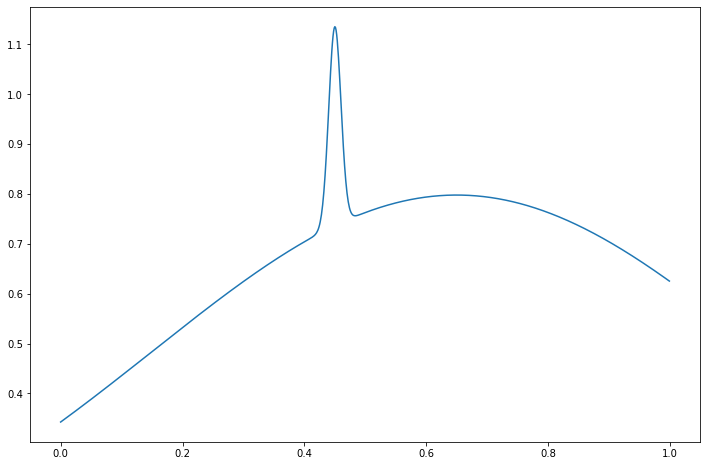

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.arange(0, 1, step=1e-3)
plt.figure(figsize=(12, 8))
plt.plot(xx, norm.pdf(xx, loc=0.65, scale=0.5) + 1e-2 * norm.pdf(xx, loc=0.45, scale=0.01))
plt.show()

It's hard to estimate $f$ using the methods we discussed so far.  If we use a cosine basis and only keep the low order terms, we will miss the peak;  if we allow higher order terms we will find the peak but we will make the rest of the curve very wiggly.  Similar comments apply to kernel regression: if we use a large bandwidth, then we will smooth out the peak;  if we use a small bandwidth, then we will find the peak but we will make the rest of the curve very wiggly.

One way to estimate inhomogeneous functions is to use a more carefully chosen basis that allows us to place a "blip" in some small region without adding wiggles elsewhere.  In this section, we describe a special class of bases called **wavelets** that are aimed at fixing this problem.  Statistical inference using wavelets is a large and active area.  We will just discuss a few ideas to get a flavor of this approach.

The **father Haar wavelet** of **Haar scaling function** is defined by

$$ \phi(x) = \begin{cases}
1 & \text{if } 0 \leq x < 1 \\
0 & \text{otherwise}
\end{cases} $$

The **mother Haar wavelet** is defined by

$$
\psi(x) = \begin{cases}
-1 & \text{if } 0 \leq x \leq \frac{1}{2} \\
1  & \text{if } \frac{1}{2} < x \leq 1
\end{cases}
$$

For any integers $j$ and $k$ define

$$ \phi_{j, k}(x) = 2^{j/2} \phi(2^j x - k) 
\quad \text{and} \quad
\psi_{j, k}(x) = 2^{j/2} \psi(2^j x - k)
$$

The function $\psi_{j, k}$ has the same shape as $\psi$ but it has been rescaled by a factor of $2^{j/2}$ and shifted by a factor of $k$.

In [6]:
import numpy as np

def haar_father_wavelet(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

def haar_mother_wavelet(x):
    return np.where((x >= 0) & (x < 1),  np.where(x <= 1/2, -1, 1), 0)

def phi_wavelet(j, k):
    def f(x):
        return 2**(j / 2) * haar_father_wavelet((2**j)*x - k)
    return f

def psi_wavelet(j, k):
    def f(x):
        return 2**(j / 2) * haar_mother_wavelet((2**j)*x - k)
    return f

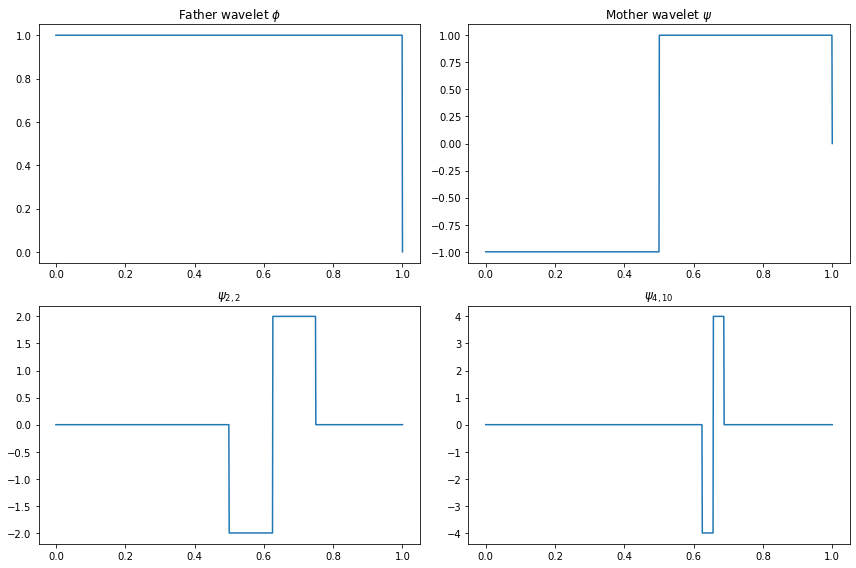

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

step = 1e-3
xx = np.arange(0, 1 + step, step=step)
plt.figure(figsize=(12, 8))

ax = plt.subplot(2, 2, 1)
ax.plot(xx, haar_father_wavelet(xx))
ax.set_title(r'Father wavelet $\phi$')
    
ax = plt.subplot(2, 2, 2)
ax.plot(xx, haar_mother_wavelet(xx))
ax.set_title(r'Mother wavelet $\psi$')

ax = plt.subplot(2, 2, 3)
ax.plot(xx, psi_wavelet(2, 2)(xx))
ax.set_title(r'$\psi_{2, 2}$')

ax = plt.subplot(2, 2, 4)
ax.plot(xx, psi_wavelet(4, 10)(xx))
ax.set_title(r'$\psi_{4, 10}$')

plt.tight_layout()
plt.show()

Notice that for large $j$, $\psi_{j, k}$ is a very localized function.  This makes it possible to add a blip to a function without adding wiggles elsewhere.  In technical terms, we say that wavelets provide a **multiresolution analysis** of $L_2(0, 1)$.

Let

$$ W_j = \{\psi_{j, k}, \; k = 0, 1, \dots, 2^j - 1\} $$

be the set of rescaled and shifted mother wavelets at resolution $j$.

**Theorem 22.13**.  The set of functions

$$ \left\{ \phi, W_0, W_1, W_2, \dots \right\} $$

is an orthonormal basis for $L_2(0, 1)$.

It follows from this theorem that we can expand any function $f \in L_2(0, 1)$ in this basis.  Because each $W_j$ is itself a set of functions, we write the expansion as a double sum:

$$ f(x) = \alpha \phi(x) + \sum_{j=0}^\infty \sum_{k=0}^{2^j - 1} \beta_{j, k} \psi_{j, k}(x) $$

where

$$ \alpha = \int_0^1 f(x) \phi(x) dx, \quad \beta_{j, k} = \int_0^1 f(x) \psi_{j, k}(x) dx$$

We call $\alpha$ the **scaling coefficient** and $\beta_{j, k}$ the **detail coefficients**.  We call the finite sum

$$ \overline{f}(x) = \alpha \phi(x) + \sum_{j=0}^{J - 1} \sum_{k=0}^{2^j - 1} \beta_{j, k}$$

the **resolution $J$** approximation to $f$.  The total number of terms in this sum is

$$ 1 + \sum_{j=0}^{J - 1}2^j = 2^J$$

Haar wavelets are localized, meaning they are zero outside of an interval, but they are not smooth.  In 1988, Ingrid Daubechie showed that such wavelets do exist.  They can be constructed numerically, but there is no closed form formula for smoother wavelets.  To keep things simple, we will continue to use Haar wavelets.

We can now use wavelets to do density estimation and regression.  We shall only discuss the regression problem $Y_i = r(x_i) + \sigma \epsilon_i$ where $\epsilon_i \sim N(0, 1)$ and $x_i = i / n$.  To simplify this discussion we assume that $n = 2^J$ for some $J$.

There is one major difference between estimation using wavelets instead of a cosine (or polynomial) basis.  With the cosine basis, we used all terms $1 \leq j \leq J$ for some $J$.  With wavelets, we use a method called **thresholding** where we keep a term in the function approximation only if its coefficient is large.  The simplest version is called hard, universal threshold.

**Haar Wavelet Regression**

1.  Let $J = \log_2 n$ and define

$$ \hat{\alpha} = S_k = \frac{1}{n} \sum_i \phi_k(x_i) Y_i
\quad \text{and} \quad
D_{j, k} = \frac{1}{n} \sum_i \psi_{j, k}(x_i) Y_i
$$

for $0 \leq j \leq J - 1$

2.  Estimate $\sigma$ by

$$ \hat{\sigma} = \sqrt{n} \; \times \; \frac{\text{median} \left( \left| D_{J-1, k} : k = 0, \dots, 2^{J - 1} - 1\right| \right)}{0.6745} $$

3.  Apply universal thresholding:

$$ \hat{\beta}_{j, k} = \begin{cases}
D_{j, k} & \text{if } \left| D_{j, k} \right| > \hat{\sigma} \sqrt{\frac{2 \log n}{n}} \\
0 & \text{otherwise}
\end{cases}$$

4.  Set

$$ \hat{f}(x) = \hat{\alpha} \phi(x) + \sum_{j = j_0}^{J - 1} \sum_{k = 0}^{2^j - 1} \hat{\beta}_{j, k} \psi_{j, k}(x) $$

In practice, we do not compute $S_k$ and $D_{j, k}$.  Instead, we use the **discrete wavelet transform (DWT)** which is very fast.  For Haar wavelets, the DWT works as follows.

**DWT for Haar Wavelets**

- Let $y = (Y_1, \dots, Y_n)$ and let $J = \log_2 n$.  
- Create a list $D$ with elements $D[0], ..., D[J - 1]$
- Do: 

```
temp <- y / sqrt(n)
for j in (J - 1):0 {
  m <- 2^j
  I <- (1:m)
  D[j] <- (temp[2 * I] - temp[(2 * I) - 1]) / sqrt(2)
  temp <- (temp[2 * I] + temp[(2 * I) - 1]) / sqrt(2)
}
```

The estimate used for $\sigma$ probably looks strange.  It is similar to the estimate used for the cosine basis but it is designed to be insensitive to sharp peaks in the function.

To understand the intuition behind universal thresholding, consider what happens when there is no signal, that is, when $\beta_{j, k} = 0$ for all $j, k$.

**Theorem 22.16**.  Suppose that $\beta_{j, k} = 0$ for all $j, k$ and let $\hat{\beta}_{j, k}$ be the universal threshold estimator.  Then

$$ \mathbb{P}\left(\hat{\beta}_{j, k} = 0 \; \text{for all } j, k \right) \rightarrow 1 $$

as $n \rightarrow \infty$.

**Proof** Assume $\sigma$ is known.  Now $D_{j, k} \approx N(0, \sigma^2 / n)$.  We will need **Mill's inequality**:  if $Z \sim N(0, 1)$ then $\mathbb{P}(|Z| > t) \leq (c / t) e^{-t^2 / 2}$ where $c = \sqrt{2 / pi}$ is a constant.  Thus,

$$
\begin{align}
\mathbb{P}(\max |D_{j, k}| > \lambda) &\leq \sum_{j, k} \mathbb{P}(|D_{j, k}| > \lambda) \\
& \leq \sum_{j, k} \mathbb{P} \left( \frac{\sqrt{n} |D_{j, k}|}{\sigma} > \frac{\sqrt{n} \lambda}{\sigma} \right) \\
& \leq \sum_{j, k} \frac{c \sigma}{\lambda \sqrt{n}} \exp \left\{ - \frac{1}{2} \frac{n \lambda^2}{\sigma^2} \right\} \\
& = \frac{c}{\sqrt{2 \log n}} \rightarrow 0
\end{align}
$$

### 22.6 Exercises

**Exercise 22.6.1**.  Prove Theorem 22.5.

The risk of $\hat{f}$ is given by

$$ R(J) = \sum_{j=1}^J \frac{\sigma_j^2}{n} + \sum_{j=J+1}^\infty \beta_j^2 $$

**Solution**.

The density estimator $\hat{f}$ is defined as

$$ \hat{f}(x) = \sum_{i=1}^J \hat{\beta}_j \phi_j(x) 
\quad \text{where} \quad
\hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n \phi_j(X_i)$$

From Theorem 22.4,

$$ \mathbb{E}[\hat{\beta}_j] = \beta_j
\quad \text{and} \quad
\mathbb{V}[\hat{\beta}_j] = \frac{\sigma_j^2}{n}
$$

The (unintegrated) variance is

$$ \mathbb{V}[f(x) - \hat{f}(x)] = \mathbb{V}[\hat{f}(x)] 
= \sum_{j=1}^J \mathbb{V}[\hat{\beta}_j]\phi_j(x)^2 + 2 \sum_{i < j} \text{Cov}(\hat{\beta}_i, \hat{\beta}_j) \phi_i(x) \phi_j(x) $$

so, integrating,

$$
\begin{align}
\int \mathbb{V}[f(x) - \hat{f}(x)] dx &= \sum_{j=1}^J \mathbb{V}[\hat{\beta}_j] \int \phi_j(x)^2 dx + 2 \sum_{i < j} \text{Cov}(\hat{\beta}_i, \hat{\beta}_j) \int \phi_i(x) \phi_j(x) dx  \\
&= \sum_{j=1}^J \mathbb{V}[\hat{\beta}_j] \langle \phi_j, \phi_j \rangle + 2 \sum_{i < j} \text{Cov}(\hat{\beta}_i, \hat{\beta}_j) \langle \phi_i, \phi_j \rangle \\
&= \sum_{j=1}^J \mathbb{V}[\hat{\beta}_j] = \sum_{j=1}^J \frac{\sigma_j^2}{n}
\end{align}
$$

while the integrated expected bias squared is:

$$ 
\begin{align}
\int \mathbb{E}\left[\left(f(x) - \hat{f}(x)\right)^2\right] dx
&= \int \mathbb{E}\left[\left(\sum_{j=1}^\infty \beta_j \phi_j(x) - \sum_{j=1}^J \hat{\beta}_j \phi_j(x)\right)^2\right] dx \\
&= \int \mathbb{E} \left[ \left(\sum_{j=1}^\infty \beta_j \phi_j(x)\right)^2 \right] dx
+ \int \mathbb{E} \left[ \left(\sum_{j=1}^J \hat{\beta}_j \phi_j(x)\right)^2 \right] dx
- \int \mathbb{E} \left[ \sum_{i=1}^\infty \sum_{j=1}^J \beta_i \hat{\beta}_j \phi_i(x) \phi_j(x) \right] dx \\
&= \sum_{j=1}^\infty \beta_j^2 \int \phi_j(x)^2 dx 
+ \sum_{j=1}^J \beta_j^2 \int \phi_j(x)^2 dx 
- 2 \sum_{j=1}^J \beta_j^2 \int \phi_j(x)^2 dx \\
&= \sum_{j=J+1}^\infty \beta_j^2
\end{align}
$$

since $\langle \phi_i, \phi_j \rangle = \int \phi_i(x) \phi_j(x) dx = 0$ for $i \neq j$, and since $\langle \phi_j, \phi_j \rangle = \int \phi_j(x)^2 dx = 1$.

Then, the risk is the bias squared plus the variance,

$$ R(J) = \sum_{j=1}^J \frac{\sigma_j^2}{n} + \sum_{j=J+1}^\infty \beta_j^2$$

as desired.

**Exercise 22.6.2**.  Prove Theorem 22.9.

The risk $R(J)$ of the estimator $ \hat{r}(x) = \sum_{j=1}^J \hat{\beta}_j \phi_j(x) $ is

$$ R(J) = \frac{J \sigma^2}{n} + \sum_{j=J+1}^\infty \beta_j^2 $$

**Solution**.  Consider the probability distribution function obtained by shifting the true regression function to a minimum of 0, and rescaled to integrate to 1:

$$ f(x) = \frac{r(x) - r_0}{A} \quad \text{where } A = \int r(y) dy - r_0, r_0 = \inf_x r(x) $$

But if $r(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)$, then 

$$ f(x) = -\frac{r_0}{A} + \sum_{j=1}^\infty \left( \frac{\beta_j}{A} \right) \phi_j(x) = \sum_{j=1}^\infty \left( \frac{\beta_j}{A} + c_j \right) \phi_j(x) $$

where the $c_j$'s are the decomposition of the constant function $-r_0 / A$ on the basis of the functions $\phi_j$'s. Assuming a sensible basis, $\phi_0$ is constant and $c_j = 0$ for $j > 1$.

By theorem 22.5, the risk of the PDF estimation is

$$ \sum_{j=1}^J \frac{\sigma_j^2}{n} + \sum_{j=J+1}^\infty \left( \frac{\beta_j}{A} \right)^2 = \frac{1}{A^2} \left( \frac{J \sigma^2}{n} + \sum_{j=J+1}^\infty \beta_j^2 \right)$$

and so the result follows.

**Exercise 22.6.3**.  Let

$$ \psi_1 = \left( \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}} , \frac{1}{\sqrt{3}} \right),
\quad
\psi_2 = \left( \frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}} , 0 \right),
\quad
\psi_3 = \left( \frac{1}{\sqrt{6}}, \frac{1}{\sqrt{6}} , -\frac{2}{\sqrt{6}} \right)
$$

Show that these vectors have norm 1 and are orthogonal.

**Solution**.  Results follow from inspection.

Norms:

$$
\begin{align}
\langle \psi_1, \psi_1 \rangle &= \frac{1}{\sqrt{3}} \cdot \frac{1}{\sqrt{3}} + \frac{1}{\sqrt{3}} \cdot \frac{1}{\sqrt{3}} + \frac{1}{\sqrt{3}} \cdot \frac{1}{\sqrt{3}} \\&= \frac{1}{3} + \frac{1}{3} + \frac{1}{3} &= 1 \\
\langle \psi_2, \psi_2 \rangle &= \frac{1}{\sqrt{2}} \cdot \frac{1}{\sqrt{2}} + \frac{-1}{\sqrt{2}} \cdot \frac{-1}{\sqrt{2}} + 0 \cdot 0 \\&= \frac{1}{2} + \frac{1}{2} + 0 &= 1 \\
\langle \psi_3, \psi_3 \rangle &= \frac{1}{\sqrt{6}} \cdot \frac{1}{\sqrt{6}} + \frac{1}{\sqrt{6}} \cdot \frac{1}{\sqrt{6}} + \frac{-2}{\sqrt{6}} \cdot \frac{-2}{\sqrt{6}}\\ &= \frac{1}{6} + \frac{1}{6} + \frac{4}{6} &= 1
\end{align}
$$

Orthogonality:
$$
\begin{align}
\langle \psi_1, \psi_2 \rangle &= \frac{1}{\sqrt{3}} \cdot \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{3}} \cdot \frac{-1}{\sqrt{2}} + \frac{1}{\sqrt{3}} \cdot 0 \\&= \frac{1}{\sqrt{6}} + \frac{-1}{\sqrt{6}} + 0 &= 0 \\
\langle \psi_1, \psi_3 \rangle &= \frac{1}{\sqrt{3}} \cdot \frac{1}{\sqrt{6}} + \frac{1}{\sqrt{3}} \cdot \frac{1}{\sqrt{6}} + \frac{1}{\sqrt{3}} \cdot \frac{-2}{\sqrt{6}} \\&= \frac{1}{3\sqrt{2}} + \frac{1}{3\sqrt{2}} + \frac{-2}{3\sqrt{2}} &= 0 \\
\langle \psi_2, \psi_3 \rangle &= \frac{1}{\sqrt{2}} \cdot \frac{1}{\sqrt{6}} + \frac{-1}{\sqrt{2}} \cdot \frac{1}{\sqrt{6}} + 0 \cdot \frac{-2}{\sqrt{6}} \\&= \frac{1}{2\sqrt{3}} + \frac{-1}{2\sqrt{3}} + 0 &= 0 
\end{align}
$$

**Exercise 22.6.4**.  Prove Parseval's relation equation.

$$ \Vert f \Vert^2 \equiv \int f^2(x) dx = \sum_{j=1}^\infty \beta_j^2 \equiv \Vert \beta \Vert^2$$

**Solution**.  We have:

$$ 
\begin{align}
\int f^2(x) dx &= \int \left( \sum_{i=1}^\infty \beta_i \phi_i(x) \right)^2 dx \\
&= \int \left( \sum_{i=1}^\infty \beta_i^2 \phi_i^2(x) + \sum_{i=1}^\infty \sum_{j=1, j \neq i}^\infty \beta_i \beta_j \phi_i(x) \phi_j(x) \right) dx \\
&= \sum_{i=1}^\infty \beta_i^2 \int \phi_i^2(x) dx + \sum_{i=1}^\infty \sum_{j=1, j \neq i}^\infty \beta_i \beta_j  \int \phi_i(x) \phi_j(x) dx \\
&= \sum_{i=1}^\infty \beta_i^2 \langle \phi_i, \phi_i \rangle + \sum_{i=1}^\infty \sum_{j=1, j \neq i}^\infty \beta_i \beta_j \langle \phi_i, \phi_j \rangle \\
&= \sum_{i=1}^\infty \beta_i^2
\end{align}
$$

since $\langle \phi_i, \phi_i \rangle = 1$ and $\langle \phi_i, \phi_j \rangle = 0$ for $i \neq j$.

**Exercise 22.6.5**.  Plot the first five Legendre polynomials.  Verify, numerically, that they are orthonormal.

**Solution**.

In [8]:
import sympy
from sympy.abc import x
from functools import lru_cache

@lru_cache(maxsize=None)
def legendre_polynomial(j):
    if j == 0:
        return 1
    if j == 1:
        return x
    
    return sympy.expand(((2*j - 1) * x * legendre_polynomial(j - 1) - (j - 1) * legendre_polynomial(j - 2)) / j)

def legendre_basis(j):
    if j == 0:
        return lambda x: np.sqrt(1/2) * np.ones_like(x)
    
    pj = legendre_polynomial(j)
    return sympy.lambdify(x, sympy.sqrt((2*j + 1) / 2) * pj, "numpy")

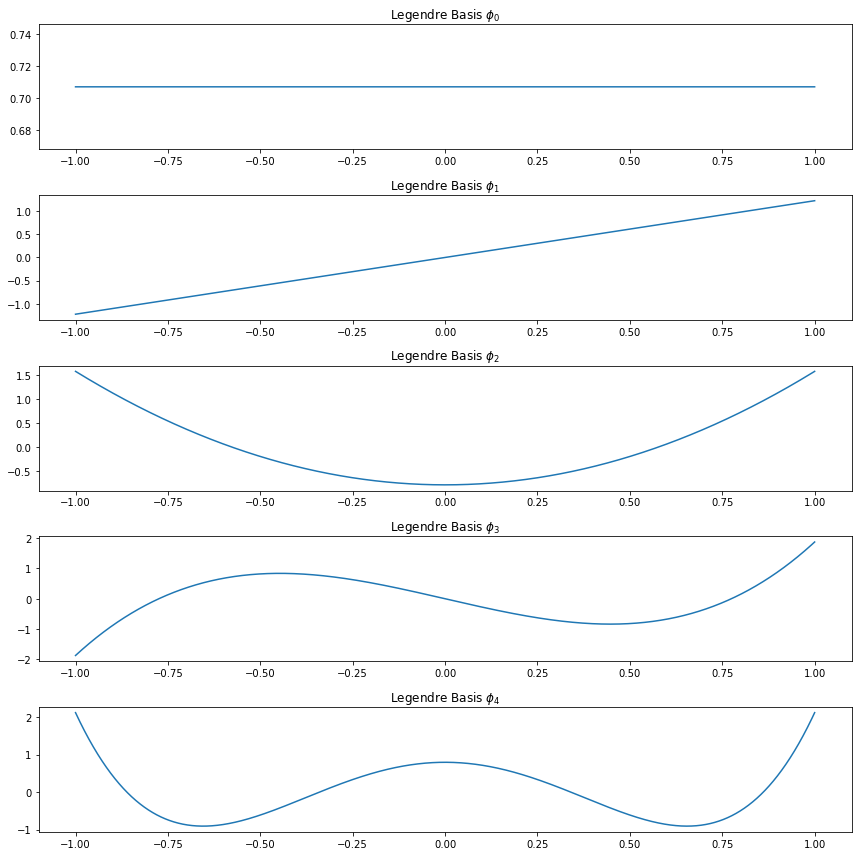

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

step = 1e-4
xx = np.arange(-1, 1 + step, step=step)
plt.figure(figsize=(12, 12))
for i in range(0, 5):
    
    # Set up the plot
    ax = plt.subplot(5, 1, i + 1)
    ax.plot(xx, legendre_basis(i)(xx))
    ax.set_title(r'Legendre Basis $\phi_%i$' % i)

plt.tight_layout()
plt.show()

In [10]:
# Verifying orthogonality numerically

for i in range(0, 5):
    for j in range(i,5):
        product = legendre_basis(i)(xx) @ legendre_basis(j)(xx) * step
        print("<phi_%i, phi_%i>: %.3f" % (i, j, product))

<phi_0, phi_0>: 1.000
<phi_0, phi_1>: -0.000
<phi_0, phi_2>: 0.000
<phi_0, phi_3>: -0.000
<phi_0, phi_4>: 0.000
<phi_1, phi_1>: 1.000
<phi_1, phi_2>: -0.000
<phi_1, phi_3>: 0.000
<phi_1, phi_4>: -0.000
<phi_2, phi_2>: 1.000
<phi_2, phi_3>: -0.000
<phi_2, phi_4>: 0.000
<phi_3, phi_3>: 1.000
<phi_3, phi_4>: -0.000
<phi_4, phi_4>: 1.000


**Exercise 22.6.6**.  Expand the following functions in the cosine basis on $[0, 1]$.  For (a) and (b), find the coefficients $\beta_j$ analytically.  For (c) and (d), find the coefficients $\beta_j$ numerically, i.e.

$$ \beta_j = \int_0^1 f(x) \phi_j(x) \approx \frac{1}{N} \sum_{r=1}^N f \left( \frac{r}{N} \right) \phi_j \left( \frac{r}{N} \right) $$

for some large integer $N$.  Then plot the partial sum $\sum_{j=1}^n \beta_j \phi_j(x)$ for increasing values of $n$.

**(a)** $f(x) = \sqrt{2} \cos (3 \pi x)$

**(b)** $f(x) = \sin(\pi x)$

**(c)** $f(x) = \sum_{j=1}^{11} h_j K(x - t_j)$, where $K(t) = (1 + \text{sign}(t)) / 2$,

$$ 
(t_j) = (.1, .13, .15, .23, .25, .40, .44, .65, .76, .78, .81), \\
(h_j) = (4, -5, 3, -4, 5, -4.2, 2.1, 4.3, -3.1, 2.1, -4.2)
$$

**(d)**  $f(x) = \sqrt{x(1-x)} \sin \left( \frac{2.1 \pi}{(x + .05)} \right) $

**Solution**.